Plots learning curve

Last Modified: 1/3/2019
by Toshiki Tsuchiya

subject info:

|subject|block1|block2|block3|block4|block5|block6|
|-------|:----:|:----:|:----:|:----:|:----:|:----:|
|*pair1*  |U800  |U400  |S200  |S100  |U800* |-     |
|*pair2*  |U800  |U400  |S200  |S100  |U800  |-     |
|*pair3*  |U800  |U400  |S200  |S100  |U800* |-     |
|*pair4*  |U800  |U400  |S200  |S100  |U800  |U800* |
|*pair5*  |S100  |S200  |U400  |U800  |U800* |S100* |
|*pair6*  |S100  |S200  |U400  |U800  |U800* |U800*    |
|*pair7*  |S100  |S200  |U400  |U800  |U800* |-     |
|*pair8*  |S100  |S200  |U400  |U800  |U800  |U800* |

*: Force field 教示


In [508]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [509]:
# Load data
data=pd.read_csv('/Users/toshikitsuchiya/Desktop/Leader-Follower/November/LF_summary_november.csv')

# get column names
# list(data)

In [510]:
# remove error trials
data.loc[data['error_trial']==0,'maxAng']=np.nan
data.loc[data['error_trial']==0,'MT_left']=np.nan
data.loc[data['error_trial']==0,'MT_right']=np.nan

In [496]:
# Run this cell if you want to remove outliers
# outliers were defined as value out side of [0.05 0.95] quantile computed for each condition


#remove outlier maxAng
res = data.groupby(['stiffness_gain'])["maxAng"].quantile([0.05, 0.95]).unstack(level=1)
(res.loc[data.stiffness_gain, 0.05] < data.maxAng.values) & (data.maxAng.values < res.loc[data.stiffness_gain, 0.95])
data.loc[((res.loc[data.stiffness_gain, 0.05] < data.maxAng.values) & (data.maxAng.values < res.loc[data.stiffness_gain, 0.95])).values==False, 'maxAng']=np.nan

#remove outlier MT_left
res = data.groupby(['stiffness_gain'])["MT_left"].quantile([0.05, 0.95]).unstack(level=1)
(res.loc[data.stiffness_gain, 0.05] < data.MT_left.values) & (data.MT_left.values < res.loc[data.stiffness_gain, 0.95])
data.loc[((res.loc[data.stiffness_gain, 0.05] < data.MT_left.values) & (data.MT_left.values < res.loc[data.stiffness_gain, 0.95])).values==False, 'MT_left']=np.nan

#remove outlier MT_right
res = data.groupby(['stiffness_gain'])["MT_right"].quantile([0.05, 0.95]).unstack(level=1)
(res.loc[data.stiffness_gain, 0.05] < data.MT_right.values) & (data.MT_right.values < res.loc[data.stiffness_gain, 0.95])
data.loc[((res.loc[data.stiffness_gain, 0.05] < data.MT_right.values) & (data.MT_right.values < res.loc[data.stiffness_gain, 0.95])).values==False, 'MT_right']=np.nan

#number of data points kept
res_ratio = data.groupby(['pair','block_number','stiffness_gain'])['trial_num','maxAng','MT_left','MT_right'].count()



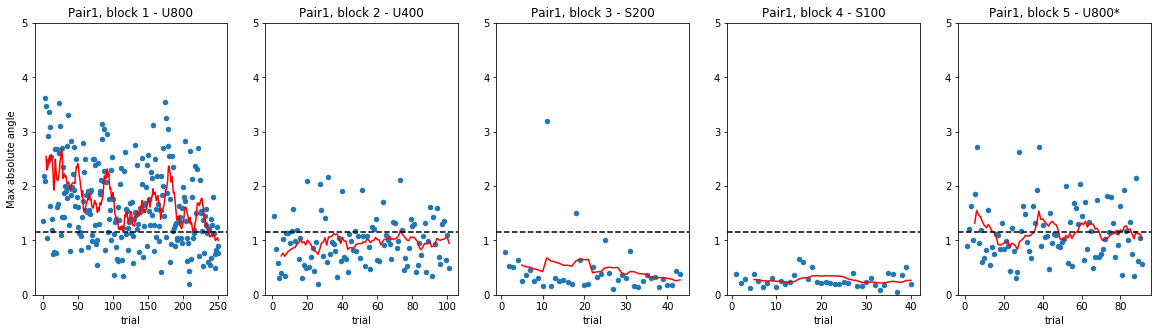

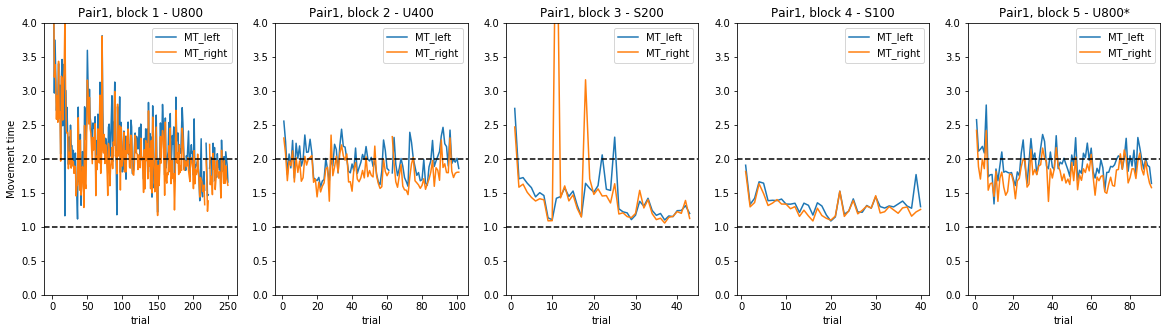

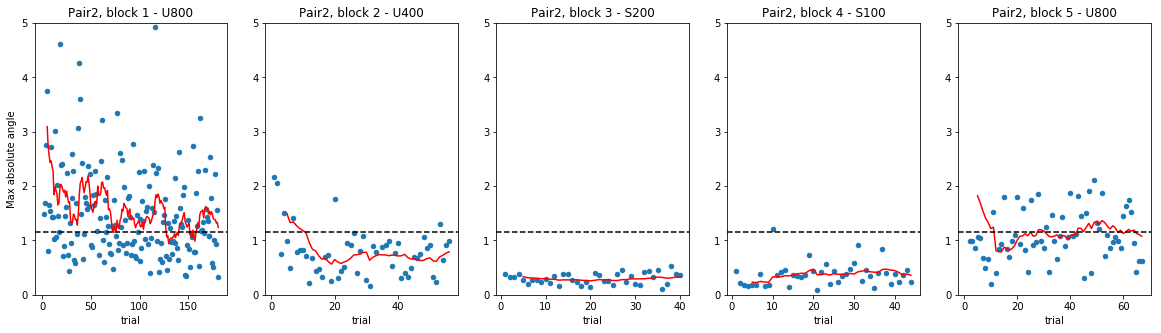

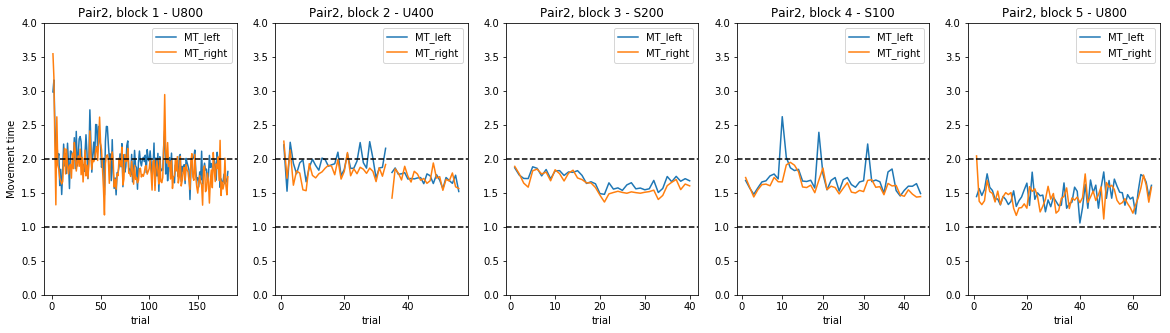

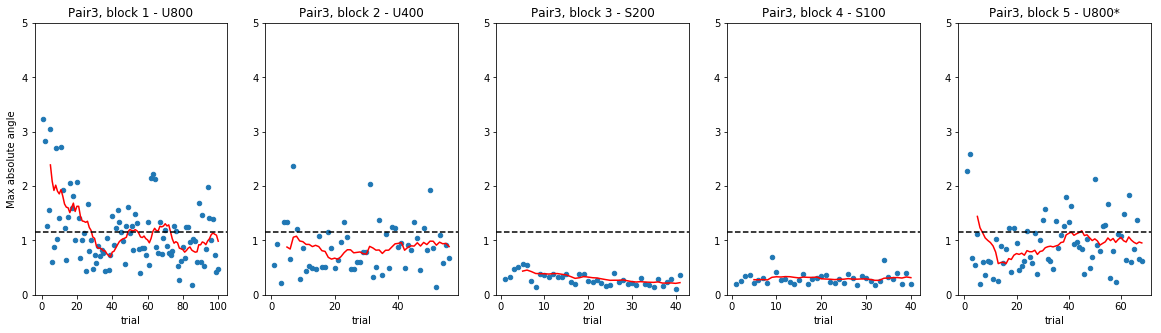

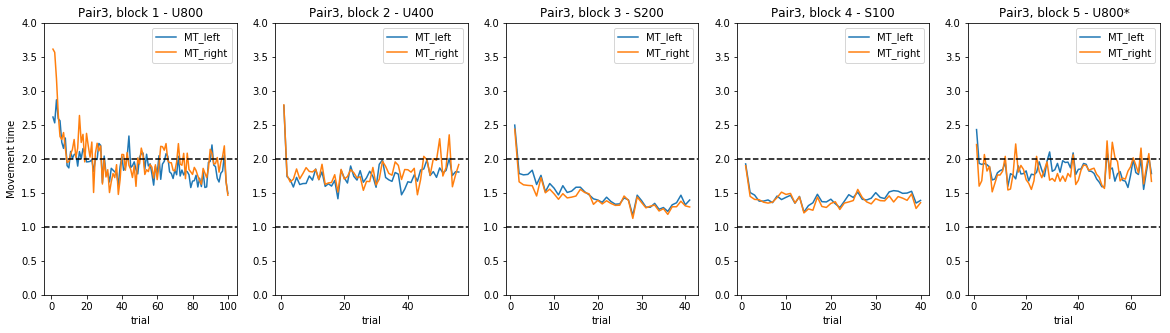

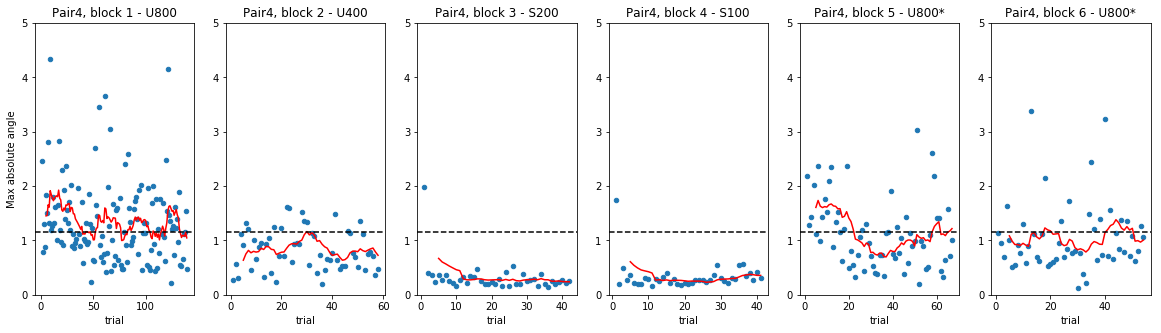

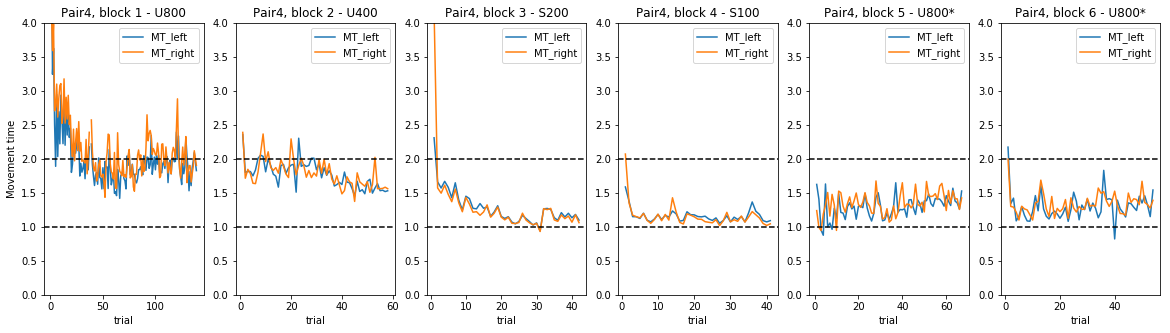

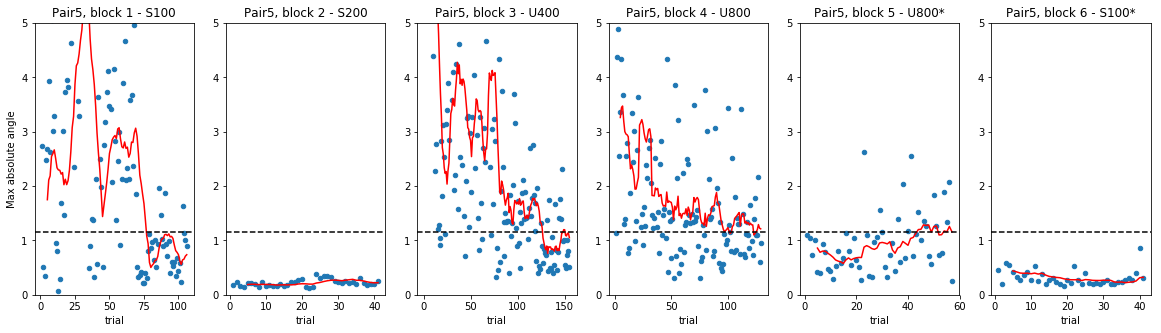

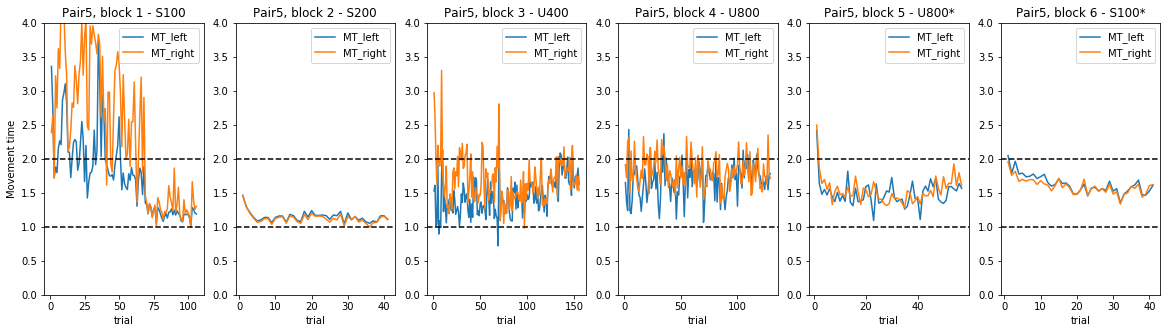

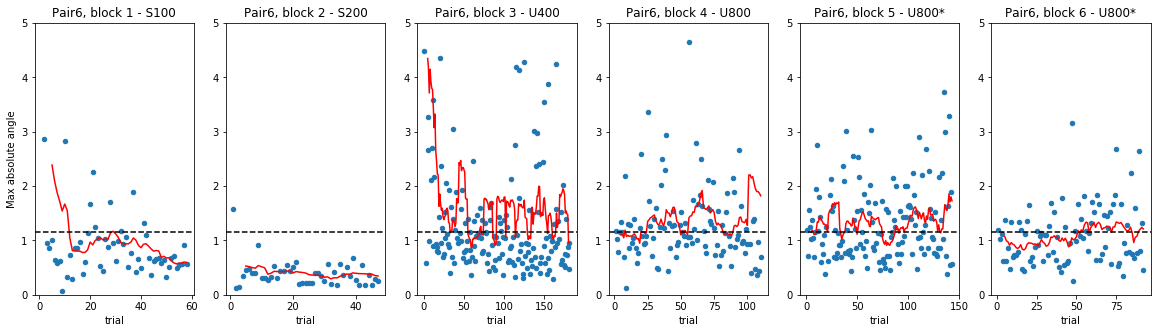

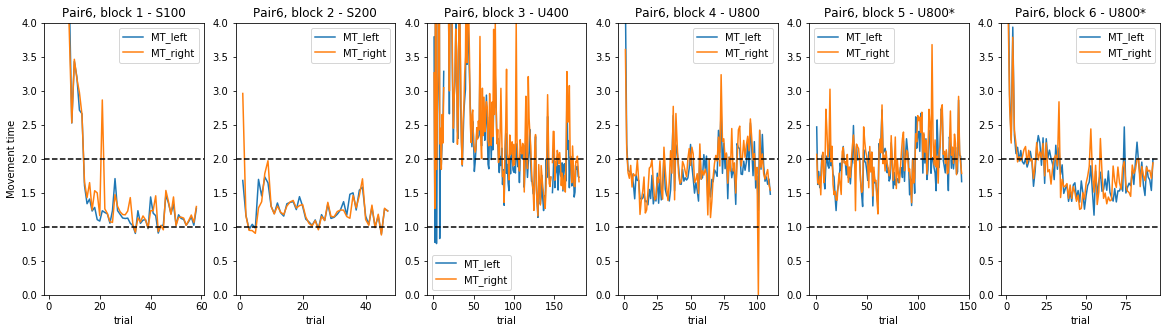

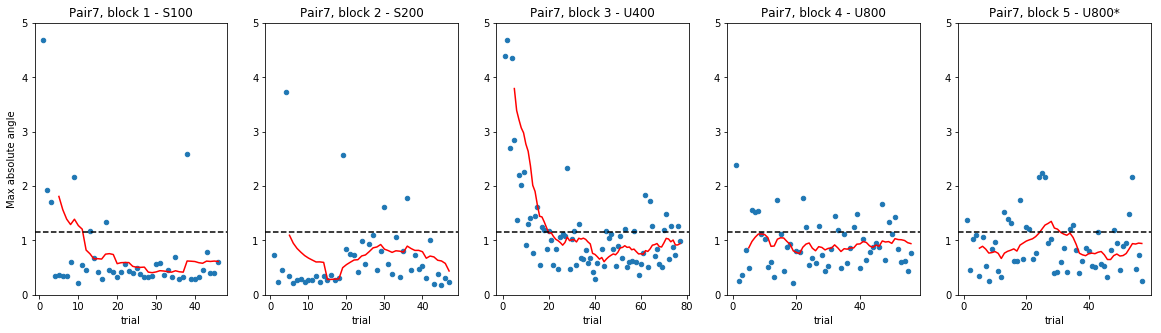

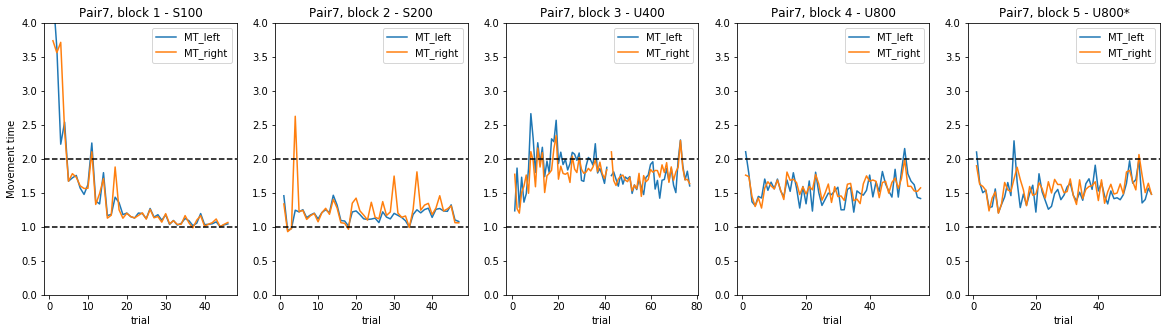

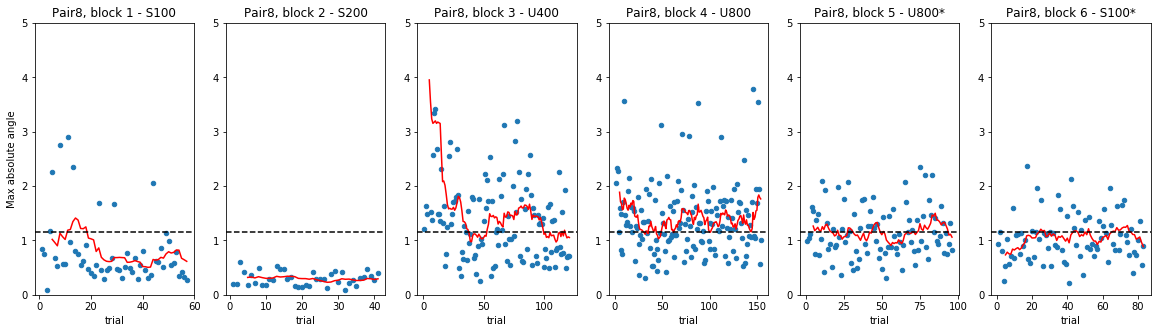

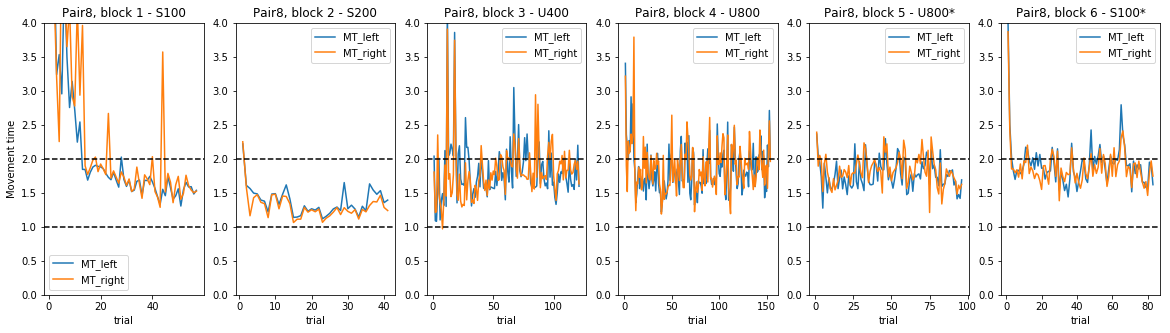

In [511]:
# plot by individual subject pair 


# Pair-condition dictionary
cond={1:['U800','U400','S200','S100','U800*'],
      2:['U800','U400','S200','S100','U800'],
      3:['U800','U400','S200','S100','U800*'],
      4:['U800','U400','S200','S100','U800*','U800*'],
      5:['S100','S200','U400','U800','U800*','S100*'],
      6:['S100','S200','U400','U800','U800*','U800*'],
      7:['S100','S200','U400','U800','U800*'],
      8:['S100','S200','U400','U800','U800*','S100*']}

#moving average data points
win=11
win_min=5

#loop by subject pair
for n in np.arange(8):
    
    #get data for the subject pair
    data_by_pair=data.loc[data['pair']==n+1]
    
    #find number of subplot needed
    num_subplot=data_by_pair['block_number'].unique().max()
    

    # compute moving average of max angle
    group_roll=data_by_pair.groupby('block_number')['maxAng'].rolling(win,min_periods=win_min).mean()

    # plot max angle
    fig, ax = plt.subplots(1,num_subplot,figsize=(20,5))
    for i in np.arange(num_subplot):
        #plot raw
        data_by_pair.loc[data['block_number']==i+1].plot(kind='scatter',x='trial_num', y='maxAng', ax=ax[i], ylim=[0,5])
        #plot moving average
        ax[i].plot(data_by_pair.loc[data['block_number']==i+1]['trial_num'],group_roll[i+1], 'r')
        
        # angle threshold
        ax[i].axhline(y=1.15, color='k', linestyle='--')

        ax[i].set_title('Pair{}, block {} - {}'.format(n+1, i+1, cond[n+1][i]))
        ax[i].set_xlabel('trial')
        if i==0:
            ax[i].set_ylabel('Max absolute angle')
        else:
            ax[i].set_ylabel('')
    
    # plot movement time
    fig, ax = plt.subplots(1,num_subplot,figsize=(20,5))
    for i in np.arange(num_subplot):
        data_by_pair.loc[data['block_number']==i+1].plot(x='trial_num', y='MT_left', ax=ax[i], ylim=[0,4])
        data_by_pair.loc[data['block_number']==i+1].plot(x='trial_num', y='MT_right', ax=ax[i], ylim=[0,4])

        # movement time threshold
        ax[i].axhline(y=1, color='k', linestyle='--')
        ax[i].axhline(y=2, color='k', linestyle='--')

        ax[i].set_title('Pair{}, block {} - {}'.format(n+1, i+1, cond[n+1][i]))
        ax[i].set_xlabel('trial')

        if i==0:
            ax[i].set_ylabel('Movement time')

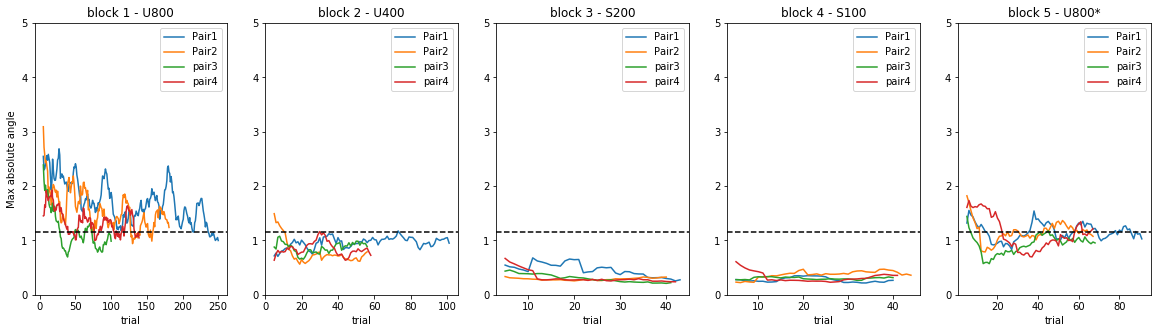

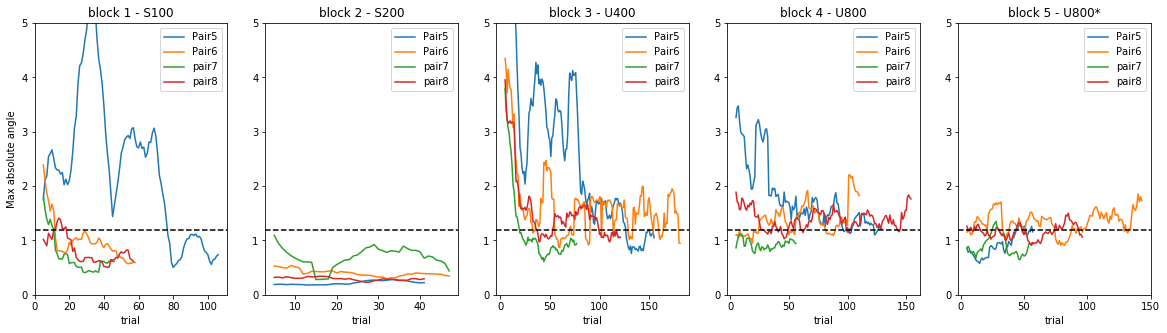

In [512]:
# plot moving avarage as group, maxAng

# Pair-condition dictionary
cond={1:['U800','U400','S200','S100','U800*'],
      2:['U800','U400','S200','S100','U800'],
      3:['U800','U400','S200','S100','U800*'],
      4:['U800','U400','S200','S100','U800*','U800*'],
      5:['S100','S200','U400','U800','U800*','S100*'],
      6:['S100','S200','U400','U800','U800*','U800*'],
      7:['S100','S200','U400','U800','U800*'],
      8:['S100','S200','U400','U800','U800*','S100*']}

#moving average data points
win=11
win_min=5

#find number of subplot needed
num_subplot=5

# plot max angle
fig, ax = plt.subplots(1,num_subplot,figsize=(20,5))

#loop by subject pair, hard -> easy
for n in np.arange(4):
    
    #get data for the subject pair
    data_by_pair=data.loc[data['pair']==n+1]
    

    # compute moving average of max angle
    group_roll=data_by_pair.groupby('block_number')['maxAng'].rolling(win,min_periods=win_min).mean()


    for i in np.arange(num_subplot):
        #plot moving average
        ax[i].plot(data_by_pair.loc[data['block_number']==i+1]['trial_num'],group_roll[i+1])
        ax[i].set_ylim([0,5])
        
        
        
        ax[i].set_title('block {} - {}'.format(i+1, cond[n+1][i]))
        ax[i].set_xlabel('trial')
        if i==0:
            ax[i].set_ylabel('Max absolute angle')
        else:
            ax[i].set_ylabel('')
            
        if n==3:
            ax[i].legend(['Pair1','Pair2','pair3','pair4'])
            # angle threshold
            ax[i].axhline(y=1.15, color='k', linestyle='--')


# plot max angle
fig, ax = plt.subplots(1,num_subplot,figsize=(20,5))

#loop by subject pair, easy -> hard
for n in np.arange(4,8):
    
    #get data for the subject pair
    data_by_pair=data.loc[data['pair']==n+1]
    

    # compute moving average of max angle
    group_roll=data_by_pair.groupby('block_number')['maxAng'].rolling(win,min_periods=win_min).mean()


    for i in np.arange(num_subplot):
        #plot moving average
        ax[i].plot(data_by_pair.loc[data['block_number']==i+1]['trial_num'],group_roll[i+1])
        ax[i].set_ylim([0,5])
        
        
        
        ax[i].set_title('block {} - {}'.format(i+1, cond[n+1][i]))
        ax[i].set_xlabel('trial')
        if i==0:
            ax[i].set_ylabel('Max absolute angle')
        else:
            ax[i].set_ylabel('')
            
        if n==7:
            ax[i].legend(['Pair5','Pair6','pair7','pair8'])
            # angle threshold
            ax[i].axhline(y=1.2, color='k', linestyle='--')

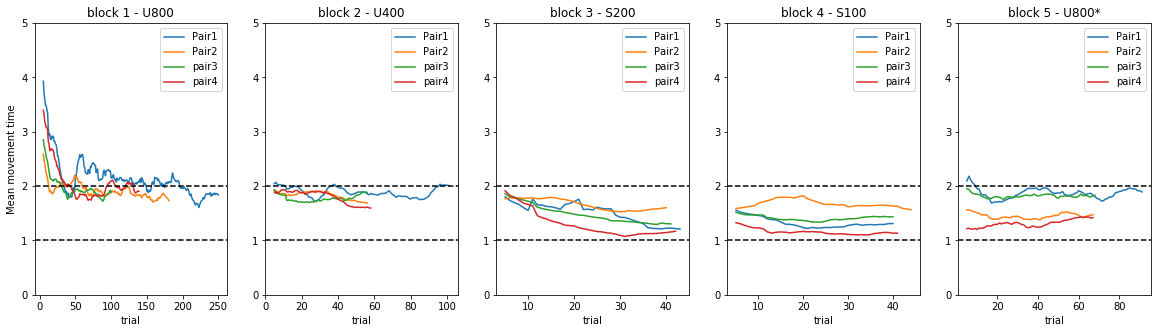

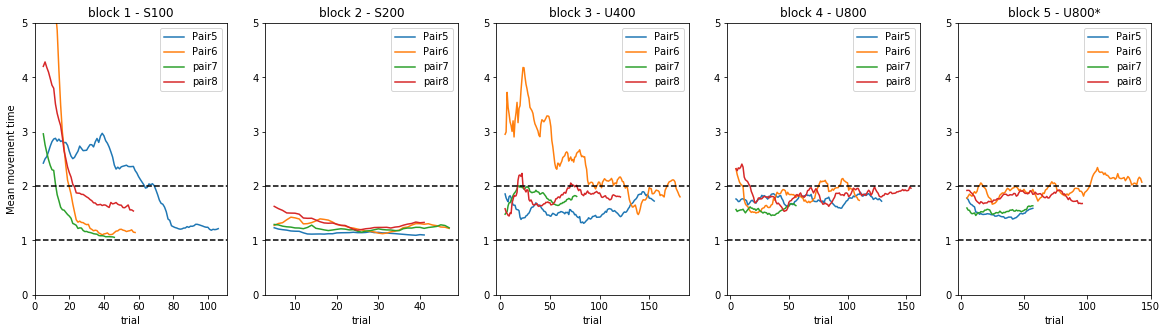

In [513]:
# plot moving average as group, movement time

# Pair-condition dictionary
cond={1:['U800','U400','S200','S100','U800*'],
      2:['U800','U400','S200','S100','U800'],
      3:['U800','U400','S200','S100','U800*'],
      4:['U800','U400','S200','S100','U800*','U800*'],
      5:['S100','S200','U400','U800','U800*','S100*'],
      6:['S100','S200','U400','U800','U800*','U800*'],
      7:['S100','S200','U400','U800','U800*'],
      8:['S100','S200','U400','U800','U800*','S100*']}

#moving average data points
win=11
win_min=5

#find number of subplot needed
num_subplot=5

# plot movement time
fig, ax = plt.subplots(1,num_subplot,figsize=(20,5))

#loop by subject pair hard -> easy
for n in np.arange(4):
    
    #get data for the subject pair
    data_by_pair=data.loc[data['pair']==n+1]
    

    # compute moving average of movement time for each subject
    group_roll_left=data_by_pair.groupby('block_number')['MT_left'].rolling(win,min_periods=win_min).mean()
    group_roll_right=data_by_pair.groupby('block_number')['MT_right'].rolling(win,min_periods=win_min).mean()
    
    # compute average movement time between subject
    group_roll=(group_roll_left+group_roll_right)/2


    for i in np.arange(num_subplot):
        #plot moving average
        ax[i].plot(data_by_pair.loc[data['block_number']==i+1]['trial_num'],group_roll[i+1])
        ax[i].set_ylim([0,5])
        
        
        
        ax[i].set_title('block {} - {}'.format(i+1, cond[n+1][i]))
        ax[i].set_xlabel('trial')
        if i==0:
            ax[i].set_ylabel('Mean movement time')
        else:
            ax[i].set_ylabel('')
            
        if n==3:
            ax[i].legend(['Pair1','Pair2','pair3','pair4'])
            # movement time threshold
            ax[i].axhline(y=1, color='k', linestyle='--')
            ax[i].axhline(y=2, color='k', linestyle='--')


# plot movement time
fig, ax = plt.subplots(1,num_subplot,figsize=(20,5))

#loop by subject pair, easy -> hard
for n in np.arange(4,8):
    
    #get data for the subject pair
    data_by_pair=data.loc[data['pair']==n+1]
    

    # compute moving average of movement time for each subject
    group_roll_left=data_by_pair.groupby('block_number')['MT_left'].rolling(win,min_periods=win_min).mean()
    group_roll_right=data_by_pair.groupby('block_number')['MT_right'].rolling(win,min_periods=win_min).mean()
    
    # compute average movement time between subject
    group_roll=(group_roll_left+group_roll_right)/2


    for i in np.arange(num_subplot):
        #plot moving average
        ax[i].plot(data_by_pair.loc[data['block_number']==i+1]['trial_num'],group_roll[i+1])
        ax[i].set_ylim([0,5])
        
        
        
        ax[i].set_title('block {} - {}'.format(i+1, cond[n+1][i]))
        ax[i].set_xlabel('trial')
        if i==0:
            ax[i].set_ylabel('Mean movement time')
        else:
            ax[i].set_ylabel('')
            
        if n==7:
            ax[i].legend(['Pair5','Pair6','pair7','pair8'])
            # movement time threshold
            ax[i].axhline(y=1, color='k', linestyle='--')
            ax[i].axhline(y=2, color='k', linestyle='--')